In [1]:
# script to get and plot TTS for rf06 with varying bl conditions
# date created: 2/17/2020
# author: sofia chelpon

In [2]:
############################ PREP WORKSPACE ############################

In [4]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [5]:
# read in ratios dataframe
path = "/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_bl/contrast_ratios_varyBLheight.pkl"
contrast_ratios = pd.read_pickle(path)

In [7]:
# sort 
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,CampAvg_2kmBL,CampAvg_1kmBL,CampAvg_0.5kmBL
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.095296,0.088554,0.089608
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.019572,0.016854,0.015182
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.186828,0.186275,0.180812
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.198149,0.189100,0.184079
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.182235,0.157733,0.156980


In [ ]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [8]:
# tau, same for all 
tau = ratios_sort['BL_tau'].values
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau)

In [11]:
# --------------- ver 1: UT = CAMPAIGN AVG, BL = 2 km 
utbl_2km = ratios_sort['CampAvg_2kmBL']

# get tts 
my_mustar_2km, my_r2_2km, my_gf_2km, my_t_2km, mean_age_2km, \
    mode_age_2km, best_k_2km = tts_mod.get_tts(utbl_2km, tau, t, exp_decay_matrix, LT)

In [12]:
# --------------- ver 1: UT = CAMPAIGN AVG, BL = 1 km 
utbl_1km = ratios_sort['CampAvg_1kmBL']

# get tts 
my_mustar_1km, my_r2_1km, my_gf_1km, my_t_1km, mean_age_1km, \
    mode_age_1km, best_k_1km = tts_mod.get_tts(utbl_1km, tau, t, exp_decay_matrix, LT)

In [13]:
# --------------- ver 1: UT = CAMPAIGN AVG, BL = 1 km 
utbl_05km = ratios_sort['CampAvg_0.5kmBL']

# get tts 
my_mustar_05km, my_r2_05km, my_gf_05km, my_t_05km, mean_age_05km, \
    mode_age_05km, best_k_05km = tts_mod.get_tts(utbl_05km, tau, t, exp_decay_matrix, LT)

In [14]:
import imp
imp.reload(tts_mod)

<module 'tts_mod' from '/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py'>

In [12]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

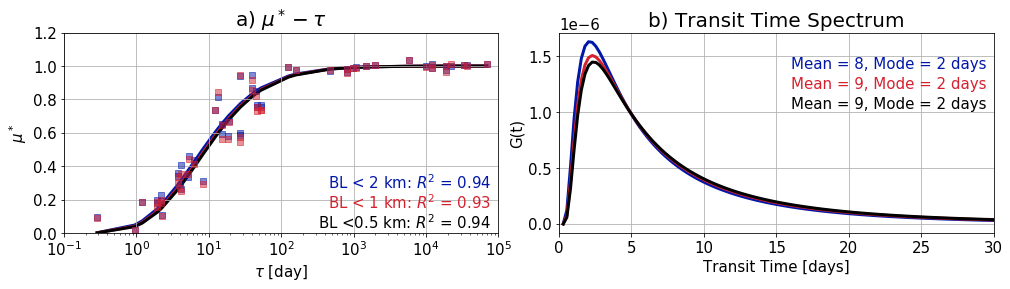

In [16]:
# --------------- start plot with campaign avg bl
title_str = 'BL < 2 km: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau, my_mustar_2km, utbl_2km, my_r2_2km, 
                                        my_gf_2km, my_t_2km, mean_age_2km, mode_age_2km, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add rf08 bl case
title_str = 'BL < 1 km: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_1km, utbl_1km, my_r2_1km, 
                                        my_gf_1km, my_t_1km, mean_age_1km, mode_age_1km, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)


# campaign average
title_str = 'BL <0.5 km: '
my_color = 'k'
overplot = 2
add_scatter = 0
add_r2 = 1 
add_meanmode = 1 

tts_mod.plot_tts(tau, my_mustar_05km, utbl_05km, my_r2_05km, 
                                        my_gf_05km, my_t_05km, mean_age_05km, mode_age_05km, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)


# --------------- save figure 
svpath = '/Volumes/scdrive2/TTS_2020/get_tts/figures/'
fig.savefig(svpath + 'tts_vary_bl_height.pdf')  
#fig.savefig(svpath + 'tts_vary_bl_rf06.svg')  